# Presenting the Data #

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from numpy import array
from sklearn import svm
from pdpbox import pdp, get_dataset, info_plots
import eli5
from eli5.sklearn import PermutationImportance
import shap
from pdpbox import pdp, info_plots
np.random.seed(0)

__Casting the column names back into the dataframe__

In [62]:
x_test.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 
                 'ca', 'thal'] 
x_train.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 
                 'ca', 'thal'] 

__I will be looking at the permutation importance to view each feature's effect on the accuracy.__

In [63]:
model=KNeighborsClassifier(n_neighbors=15).fit(x_train, y_train)
perm = PermutationImportance(model, random_state=0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0813 ± 0.0493,thal
0.0462 ± 0.0292,thalach
0.0374 ± 0.0224,cp
0.0242 ± 0.0403,oldpeak
0.0220 ± 0.0197,slope
0.0220 ± 0.0368,sex
0.0176 ± 0.0224,restecg
0.0154 ± 0.0224,ca
0.0088 ± 0.0545,exang
-0.0044 ± 0.0108,chol


Since Random Forest had the second highest accuracy rate, I wanted to check the permutation importance of that as well.

In [64]:
model=RandomForestClassifier(n_estimators=100, random_state=0).fit(x_train, y_train)
perm = PermutationImportance(model, random_state=0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0813 ± 0.0794,thal
0.0571 ± 0.0469,cp
0.0418 ± 0.0563,thalach
0.0396 ± 0.0298,oldpeak
0.0374 ± 0.0646,ca
0.0220 ± 0.0197,sex
0.0110 ± 0.0000,fbs
0.0088 ± 0.0164,slope
0.0066 ± 0.0224,trestbps
0.0066 ± 0.0513,age


I will use a partial dependence plot to take a closer look at some of the top weighted features from the KNN permutatoin importance.

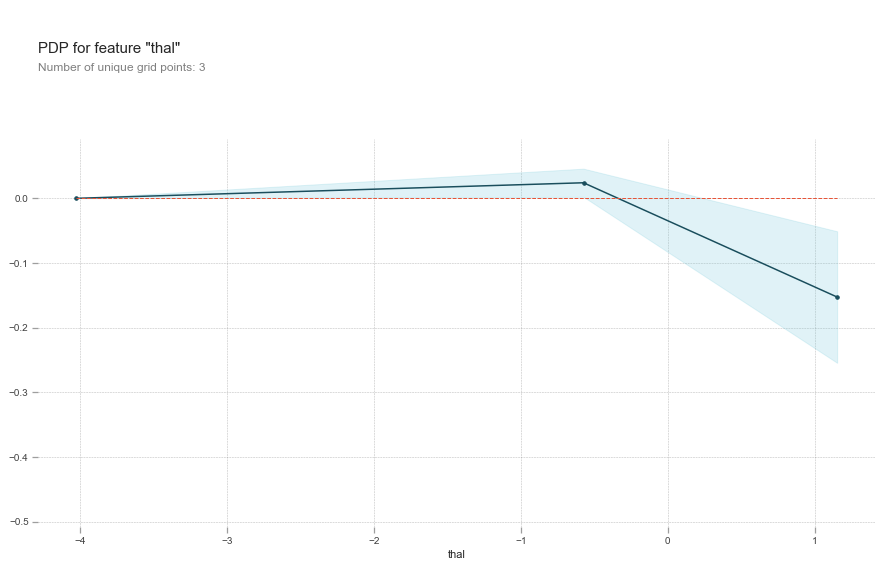

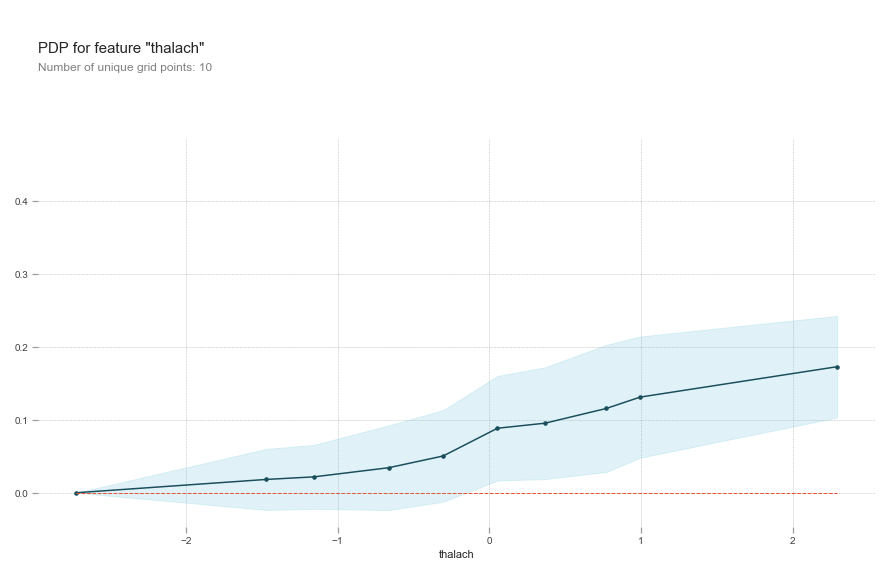

In [68]:
feature_names = [i for i in x_train.columns]

pdp_thal = pdp.pdp_isolate(model=model, dataset=x_test, model_features=feature_names, feature='thal')
pdp_thalach = pdp.pdp_isolate(model=model, dataset=x_test, model_features=feature_names, feature='thalach')
pdp.pdp_plot(pdp_thal, 'thal')
pdp.pdp_plot(pdp_thalach, 'thalach')
plt.show();

As the classification of thal changes, the level of confidence from the machine predictor increases. The highest thal value (reversable defect) has the most weight in the model as well as the most confidence.
As the regression of thalach (maximum heart rate acheived) increases, the weight on predictions increases. It is likely safe to presume those with a high maximum heart rate will likely be diagnosed with heart disease.

## Conclusion ##

My hypothesis starting this data set was that the model created would be able to accurately predict heart disease in patients using the imported data columns. This dataset has been able to fairly accurately predict the likelihood that an individual has heart disease with an 87.9% accuracy rate. I believe a larger dataset would aid in finding a higher accuracy rate. After going through the data, I am also interested to see how the models would do if the data was split by sex and run separately. Through recent studies, we have learned that women can display heart disease differently than men through symptoms, and I would be interested to discover if that stays true in the permutation importance. A larger data set would also help with this since our data is heavily swayed by males with them comprising 68.21% of all data, but only 56.10% of all males tested were diagnosed with heart disease.